In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
PATH_TRAINING='/content/drive/MyDrive/dataset_cv_Assignment5/train_images'
PATH_TESTING='/content/drive/MyDrive/dataset_cv_Assignment5/test_images'
TRAIN_CLASS_PATH='/content/drive/MyDrive/dataset_cv_Assignment5/train.csv'
TEST_CLASS_PATH='/content/drive/MyDrive/dataset_cv_Assignment5/test.csv'
#NUM_TRAINING=len(os.listdir(PATH_TRAINING))
#NUM_TESTING=len(os.listdir(PATH_TESTING))
SUBSET_TRAINING=1000
SUBSET_TESTING=500

In [ ]:
train = pd.read_csv(TRAIN_CLASS_PATH)
test = pd.read_csv(TEST_CLASS_PATH)

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
train_img = []
for img_name in tqdm(range(1000)):
    # defining the image path
    image_path = PATH_TRAINING+'/'+ str(train.ImageId[img_name])
    # reading the image
    img = imread(image_path,as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img=resize(img,(128,128))
    train_img.append(img)

train_x = np.asarray(train_img).astype('float32')

# defining the target
train_y = train['ClassName'][0:1000].values

In [ ]:
l1 = []
for i in train_y:
    if i not in l1:
        l1.append(i)

In [ ]:
train_y1=[]
for i in train_y:
  index=l1.index(i)
 
  train_y1.append(index)
train_y1 = np.asarray(train_y1).astype('int')

In [ ]:
max(train_y1)


58

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff104b5a690>,
 <matplotlib.image.AxesImage at 0x7ff104acdb50>)

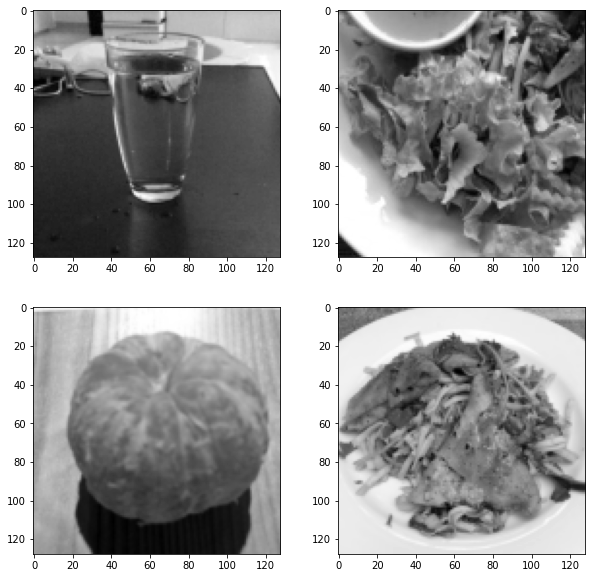

In [ ]:
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [ ]:
train_x, val_x, train_y1, val_y = train_test_split(train_x[0:9322], train_y1, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((900, 128, 128), (1000,)), ((100, 128, 128), (100,)))

In [ ]:
train_x = train_x.reshape(900,1,128,128)


train_x  = torch.from_numpy(train_x)


In [ ]:
train_y = torch.from_numpy(train_y1)

# shape of training data
train_x.shape, train_y1.shape

(torch.Size([900, 1, 128, 128]), (900,))

In [ ]:
val_x = val_x.reshape(100, 1, 128, 128)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([100, 1, 128, 128]), torch.Size([100]))

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)
train_data = CustomDataset(train_x, train_y)

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

In [ ]:
# class Net(Module):   
#     def __init__(self):
#         super(Net, self).__init__()

#         self.cnn_layers = Sequential(
#             # Defining a 2D convolution layer
#             Conv2d(1, 3, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(3),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#             # Defining another 2D convolution layer
#             Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(8),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#             # Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             # BatchNorm2d(64),
#             # ReLU(inplace=True),
#             # MaxPool2d(kernel_size=2, stride=2),
#             # Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             # BatchNorm2d(128),
#             # ReLU(inplace=True),
#             # MaxPool2d(kernel_size=2, stride=2),
#         )
#         # self.cnn_layers1 = Sequential(
#         #     # Defining a 2D convolution layer
#         #     Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#         #     BatchNorm2d(64),
#         #     ReLU(inplace=True),
#         #     MaxPool2d(kernel_size=2, stride=2),
#         #     # Defining another 2D convolution layer
#         #     Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#         #     BatchNorm2d(128),
#         #     ReLU(inplace=True),
#         #     MaxPool2d(kernel_size=2, stride=2),
          
#         # )

#         self.linear_layers = Sequential(
#             Linear(8 * 56 * 56, 61)
#         )
#         self.linear_layers1 = Sequential(
#             Linear(32 * 14 * 14, 8*14*14)
#         )
#         self.linear_layers2 = Sequential(
#             Linear(8 * 14 * 14, 61)
#         )
#         self.linear_layers3 = Sequential(
#             Linear(32 * 14 * 14, 32*14*14)
#         )
#         self.linear_layers4 = Sequential(
#             Linear(32 * 14 * 14, 61)
#         )

#     # Defining the forward pass    
#     def forward(self, x):
#         x = self.cnn_layers(x)
#         x = x.view(x.size(0), -1)
#         # x = self.cnn_layers1(x)
       
#         x = self.linear_layers(x)
#         # x = self.linear_layers1(x)
#         # x = self.linear_layers2(x)
#         #x = self.linear_layers3(x)
#         #x = self.linear_layers4(x)
#         return x

In [ ]:
num_classes = 61
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=12, out_channels=36, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        self.conv4 = nn.Conv2d(in_channels=36, out_channels=72, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        #self.linear = nn.Linear(in_features=64 * 64 * 72,out_features= 64*64*72)
        self.fc1 = nn.Linear(in_features=64 * 64 * 72,out_features= 61)

    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.pool(output)

        output = self.conv3(output)
        output = self.relu3(output)

        output = self.conv4(output)
        output = self.relu4(output)
        output = output.view(output.size(0), -1)

        #output = output.view(-1, 16 * 16 * 24)

        output = self.linear(output)
        output = self.fc1(output)

        return output

In [ ]:
# defining the model
model = Net()
# defining the optimizer
optimizer = SGD(model.parameters(), lr=0.01)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

NameError: ignored

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn


device = 'cuda' if torch.cuda.is_available() else 'cpu'



In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    count = 0
    for x_batch, y_batch in train_loader:
          # the dataset "lives" in the CPU, so do our mini-batches
          # therefore, we need to send those mini-batches to the
          # device where the model "lives"
          x_train = x_batch.to(device)
          y_train = y_batch.to(device)
          #x_train, y_train = Variable(train_x), Variable(train_y)
          # getting the validation set
          x_val, y_val = Variable(val_x), Variable(val_y)
         # converting the data into GPU format
          if torch.cuda.is_available():
              x_train = x_train.cuda()
              y_train = y_train.cuda()
              x_val = x_val.cuda()
              y_val = y_val.cuda()
          count= count+1
          # clearing the Gradients of the model parameters
          optimizer.zero_grad()
          
          # prediction for training and validation set
          output_train = model(x_train)
          #print("batch completed\n",count)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

        # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
          
          
         
          
    print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)
    # if epoch%2 == 0:
    #     # printing the validation loss
    #     print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [ ]:
# def train(epoch):
#     model.train()
#     tr_loss = 0
#     # getting the training set
#     x_train, y_train = Variable(train_x), Variable(train_y)
#     # getting the validation set
#     x_val, y_val = Variable(val_x), Variable(val_y)
#     # converting the data into GPU format
#     if torch.cuda.is_available():
#         x_train = x_train.cuda()
#         y_train = y_train.cuda()
#         x_val = x_val.cuda()
#         y_val = y_val.cuda()

#     # clearing the Gradients of the model parameters
#     optimizer.zero_grad()
    
#     # prediction for training and validation set
#     output_train = model(x_train)
#     output_val = model(x_val)

#     # computing the training and validation loss
#     loss_train = criterion(output_train, y_train)
#     loss_val = criterion(output_val, y_val)
#     train_losses.append(loss_train)
#     val_losses.append(loss_val)

#     # computing the updated weights of all the model parameters
#     loss_train.backward()
#     optimizer.step()
#     tr_loss = loss_train.item()
#     if epoch%2 == 0:
#         # printing the validation loss
#         print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(4.1104, grad_fn=<NllLossBackward>)
Epoch :  2 	 loss : tensor(4.1692, grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(4.1660, grad_fn=<NllLossBackward>)
Epoch :  4 	 loss : tensor(4.0740, grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(4.0802, grad_fn=<NllLossBackward>)
Epoch :  6 	 loss : tensor(4.0975, grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(4.1088, grad_fn=<NllLossBackward>)
Epoch :  8 	 loss : tensor(4.0818, grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(4.0888, grad_fn=<NllLossBackward>)
Epoch :  10 	 loss : tensor(4.1154, grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(4.2002, grad_fn=<NllLossBackward>)
Epoch :  12 	 loss : tensor(4.0725, grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(4.1063, grad_fn=<NllLossBackward>)
Epoch :  14 	 loss : tensor(4.0558, grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(4.0459, grad_fn=<NllLossBackward>)
Epoch :  16 	 loss : tensor(4.0256, grad_fn=<NllLossBackward>)
E

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

## Report

A simple CNN with 2 convolutional layers and one fully connected layer for classificaiton is used. This model is trained with gray-scale images. Different convolution layer parameters and optimization methods were changed and trained the model. But, no significant change observed in loss value.